In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras import regularizers
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/hussain/Downloads/iot23_combined.csv")

In [107]:
df['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
-   Benign   -                146275
DDoS                          138777
Benign                         53481
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [114]:
with open("latex.txt", "w") as text_file:
    text_file.write(df['label'].value_counts().to_latex())

In [112]:
df

,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,99994,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446617,99995,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446618,99996,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446619,99997,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
def is_sorted(a):
    for i in range(0, len(a)-1):
        if a[i+1]<a[i]:
            return False, i
    return True

In [35]:
df_sorted = df.sort_values('ts')

In [36]:
is_sorted(df_sorted['ts'].to_numpy())

True

In [37]:
df_sorted = df_sorted.drop(columns=['Unnamed: 0', 'id.orig_h', 'ts'])

In [38]:
df_sorted.loc[(df_sorted.label == '-   Benign   -'), 'label'] = 'Benign'

In [39]:
df_sorted

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
2034,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2038,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
1947,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1948,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1949,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236214,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1236216,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1236218,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1236221,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# to_drop = df_sorted[df_sorted['label'] == "C&C" or
#     df_sorted['label'] == "Attack" or
#     df_sorted['label'] == "C&C-HeartBeat" or
#     df_sorted['label'] == "C&C-FileDownload" or
#     df_sorted['label'] == "C&C-Torii" or
#     df_sorted['label'] == "FileDownload" or
#     df_sorted['label'] == "C&C-HeartBeat-FileDownload" or
#     df_sorted['label'] == "C&C-Mirai"]

def drop_columns(df, columns):
    temp = df.copy()
    for column in columns:
        temp = temp[temp['label'] != column]
    return temp

In [41]:
columns_to_drop = ["C&C",
                    "Attack",
                    "C&C-HeartBeat",
                    "C&C-FileDownload",
                    "C&C-Torii",
                    "FileDownload",
                    "C&C-HeartBeat-FileDownload",
                    "C&C-Mirai"]

df_sorted = drop_columns(df_sorted, columns_to_drop)

In [42]:
df_sorted['label'].value_counts()

PartOfAHorizontalPortScan    825939
Okiru                        262690
Benign                       199756
DDoS                         138777
Name: label, dtype: int64

In [80]:
labels = pd.get_dummies(df_sorted.loc[:, df_sorted.columns == 'label'], columns=['label']).columns
labels

Index(['label_Benign', 'label_DDoS', 'label_Okiru',
       'label_PartOfAHorizontalPortScan'],
      dtype='object')

In [44]:
def split_data(df, train_amount):
    x = df.loc[:, df.columns != 'label'].to_numpy()
    df_y = df.loc[:, df.columns == 'label']
    df_y = pd.get_dummies(df_y, columns=['label'])
    y = df_y.to_numpy()

    split_index = int(len(x)*train_amount)

    x_train, x_test = x[0:split_index, :], x[split_index:, :]
    y_train, y_test = y[0:split_index:, :], y[split_index:, :]

    return x_train, x_test, y_train, y_test

In [100]:
x_train, x_test, y_train, y_test = split_data(df_sorted, .7)

In [101]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [102]:
x_train.shape, y_train.shape

((999013, 1, 24), (999013, 4))

In [105]:
model = Sequential()
model.add(GRU(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128))
model.add(Dense(y_train.shape[1], activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
trained_model = model.fit(x_train, y_train, epochs=10, batch_size=72, validation_data=(x_test, y_test), shuffle=False)

Epoch 1/10
13876/13876 [==============================] - 37s 2ms/step - loss: 0.2909 - accuracy: 0.8801 - val_loss: 0.5272 - val_accuracy: 0.9710
Epoch 2/10
13876/13876 [==============================] - 34s 2ms/step - loss: 0.2953 - accuracy: 0.8750 - val_loss: 0.5605 - val_accuracy: 0.9715
Epoch 3/10
13876/13876 [==============================] - 35s 3ms/step - loss: 0.2997 - accuracy: 0.8757 - val_loss: 0.5290 - val_accuracy: 0.9715
Epoch 4/10
13876/13876 [==============================] - 33s 2ms/step - loss: 0.3011 - accuracy: 0.8769 - val_loss: 0.5721 - val_accuracy: 0.9715
Epoch 5/10
13876/13876 [==============================] - 33s 2ms/step - loss: 0.2926 - accuracy: 0.8800 - val_loss: 0.5128 - val_accuracy: 0.9715
Epoch 6/10
13876/13876 [==============================] - 33s 2ms/step - loss: 0.2904 - accuracy: 0.8810 - val_loss: 0.5229 - val_accuracy: 0.9715
Epoch 7/10
13876/13876 [==============================] - 32s 2ms/step - loss: 0.2948 - accuracy: 0.8803 - val_loss: 0

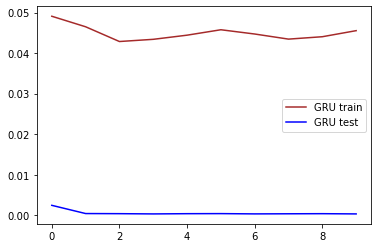

In [50]:
plt.plot(trained_model.history['loss'], label='GRU train', color='brown')
plt.plot(trained_model.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [56]:
preds = model.predict(x_test)

<AxesSubplot:>

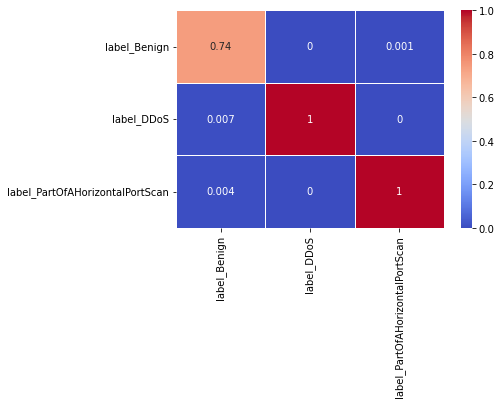

In [99]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
total = np.sum(cm)
indices, counts = value_counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)

percentages = np.zeros(cm.shape)

for iy, ix in np.ndindex(cm.shape):
    percentages[iy, ix] = cm[iy, ix]/counts[ix]

sns.heatmap(percentages.round(3), annot=True, xticklabels=labels[indices], yticklabels=labels[indices], cmap="coolwarm", linewidths=.5)
# counts

In [94]:
cm

array([[   501,     32,    145],
       [     5,  99403,     15],
       [     3,      0, 185329]], dtype=int64)

In [75]:
value_counts = np.unique(y_test, return_counts=True)
value_counts

(array([0, 1], dtype=uint8), array([856299, 285433], dtype=int64))

In [74]:
a = np.argmax(y_test, axis=1)
_, b = np.unique(a, return_counts=True)

b

array([   678,  99423, 185332], dtype=int64)

In [109]:
a = np.argmax(model.predict(x_test), axis=1)
b = np.argmax(y_test, axis=1)
print(classification_report(a, b))

              precision    recall  f1-score   support

           0       0.15      0.99      0.26      1369
           1       1.00      1.00      1.00     99435
           2       0.00      0.00      0.00         0
           3       1.00      0.96      0.98    327345

    accuracy                           0.97    428149
   macro avg       0.54      0.74      0.56    428149
weighted avg       1.00      0.97      0.98    428149



C:\Users\koend\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koend\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koend\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
pd.DataFrame(np.argmax(model.predict(x_test), axis=1)).value_counts()

5    39998
dtype: int64

In [228]:
pd.DataFrame(np.argmax(y_test, axis=1)).value_counts()

11    189082
8      99423
1        679
4         93
2         37
3         10
6          1
dtype: int64